In [1]:
import pandas as pd
df=pd.read_excel('D:\ArabicSentimentAnalysisHybride\Dataset\ArabicReviews.xlsx')

In [2]:
df

,Review,Class
0,سيئ جدا بعد الإصدار الجديد,Negative
1,ابلكيشن زباله بجد,Negative
2,سيئ التطبيق لايعمل,Negative
3,للأسف التطبيق للأسوأ كان جدا رائع وسهل وبسيط ا...,Negative
4,التحديث بطيئ جدا جدا عند الفتح,Negative
...,...,...
3995,كل مااجي اشحن المكفظه يقولي لا يوجد طرق مناسبه...,Positive
3996,V. good,Positive
3997,نزلت التطبيق ومفيش نت ينفع كدة اتخلونا انزل ال...,Positive
3998,احسن من فودافون وموبينيل واتصالات والله وحلو,Positive


In [3]:
X=df['Review']
y=df['Class']

In [4]:
X

0                              سيئ جدا بعد الإصدار الجديد
1                                       ابلكيشن زباله بجد
2                                      سيئ التطبيق لايعمل
3       للأسف التطبيق للأسوأ كان جدا رائع وسهل وبسيط ا...
4                          التحديث بطيئ جدا جدا عند الفتح
                              ...                        
3995    كل مااجي اشحن المكفظه يقولي لا يوجد طرق مناسبه...
3996                                              V. good
3997    نزلت التطبيق ومفيش نت ينفع كدة اتخلونا انزل ال...
3998         احسن من فودافون وموبينيل واتصالات والله وحلو
3999                                           خمسون نجمه
Name: Review, Length: 4000, dtype: object

In [5]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(y)
Y = encoder.transform(y)

In [6]:
Y

array([0, 0, 0, ..., 1, 1, 1])

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, LSTM, Dense, GlobalMaxPooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Sample dataset
#texts = ["This is a positive example.", "This is a negative example.", "Another text example."]
#labels = [1, 0, 1]  # Assuming binary classification

# Split the dataset into training and testing sets
train_texts, test_texts, train_labels, test_labels = train_test_split(X, Y, test_size=0.4, random_state=42)

In [9]:
print(train_texts)

1494              التطيق لا يعمل ليش كان خليتوه زي ما كان
353                                  لماذا برنامج لا يعمل
1232      اسواء بنك بالسعودية حسبي الله عليكم ونعم الوكيل
613                  لا استطيع الدخول على التطبيق لماذا ؟
3506         اسعار معقوله ومضمونه والقائمين عليها ممتازين
                              ...                        
1130          التطبيق والتحديثات مره سيئه شوفو حل للتطبيق
1294      انتم حدثتو ولا خربتو صلحو تطبيقكم اشغالنا تعطلت
860     ايش المشكله في تطبيق البنك الاهلي هل البنك عاج...
3507    تحياتي لكل فريق العمل بشركة فينوس شركة فينوس ب...
3174                                          جميييل جداا
Name: Review, Length: 2400, dtype: object


In [10]:
print(test_texts)

555     دبستوني بطاقة اتمانية ماابغاها وكل قرش اخذتوه ...
3491                                      ربنا يبارك فيكو
527     فالاول كان البرنامج جيد ويفتح بسرعه وأما الان ...
3925                                   كيف يتم إنشاء حساب
2989    جميل رائع  يوسهل في توصيل الطعام  انصح بي تجرب...
                              ...                        
3374                                       ممتاز جددددددا
1465                                       أصبح لا يعمل 👎
1672    للأسف بعد التحديث الاخير مايشتغل لا حول ولا قو...
2113                                      راااائع جدا جدا
115       البرنامج لايعمل يطلب تحديث ولايحدث أموري متعطله
Name: Review, Length: 1600, dtype: object


In [12]:
print(train_texts.shape)

(2400,)


In [14]:
print(test_texts.shape)

(1600,)


In [15]:
TrainDf = pd.DataFrame({
    'Review': train_texts,
    'Class': train_labels
})

# Print the resulting DataFrame
#print(TrainDf)
TrainDf.to_excel('D:\ArabicSentimentAnalysisHybride\output\TrainDf.xlsx')

TestDf = pd.DataFrame({
    'Review': test_texts,
    'Class': test_labels
})
TestDf.to_excel('D:\ArabicSentimentAnalysisHybride\output\TestDf.xlsx')

In [16]:
# Tokenize and pad sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_texts)
train_sequences = tokenizer.texts_to_sequences(train_texts)
test_sequences = tokenizer.texts_to_sequences(test_texts)

In [17]:
vocab_size = len(tokenizer.word_index) + 1
max_length = max(len(seq) for seq in train_sequences)
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding='post')
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding='post')




In [18]:
vocab_size

6937

In [19]:
max_length

104

In [20]:
train_padded

array([[1038,    6,   25, ...,    0,    0,    0],
       [ 137,   17,    6, ...,    0,    0,    0],
       [ 538,   19, 2282, ...,    0,    0,    0],
       ...,
       [ 112,   36,    4, ...,    0,    0,    0],
       [ 855,  663, 6930, ...,    0,    0,    0],
       [ 625,  294,    0, ...,    0,    0,    0]])

In [21]:
test_padded

array([[ 362,  269,  324, ...,    0,    0,    0],
       [ 775, 1106,    0, ...,    0,    0,    0],
       [  26,   10,  107, ...,    0,    0,    0],
       ...,
       [  71,    9,    5, ...,    0,    0,    0],
       [2291,    3,    3, ...,    0,    0,    0],
       [  10,   66,   95, ...,    0,    0,    0]])

In [22]:
TrainMatrix = pd.DataFrame(train_padded)
TrainMatrix.to_excel('D:\ArabicSentimentAnalysisHybride\output\TrainMatrix.xlsx')

TestMatrix = pd.DataFrame(test_padded)
TestMatrix.to_excel('D:\ArabicSentimentAnalysisHybride\output\TestMatrix.xlsx')

In [23]:
# Define the improved hybrid model
model = Sequential([
    Embedding(vocab_size, 100, input_length=max_length),
    Conv1D(128, 3, activation='relu'),
    LSTM(64, return_sequences=True),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])


In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 104, 100)          693700    
_________________________________________________________________
conv1d (Conv1D)              (None, 102, 128)          38528     
_________________________________________________________________
lstm (LSTM)                  (None, 102, 64)           49408     
_________________________________________________________________
global_max_pooling1d (Global (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 785,861
Trainable params: 785,861
Non-trainable params: 0
__________________________________________________

In [25]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [26]:
model.save('D:\ArabicSentimentAnalysisHybride\output\improved_hybrid_model.h5')

In [27]:
# Train the model
history=model.fit(train_padded, train_labels, epochs=10, validation_data=(test_padded, test_labels))

Epoch 1/10
75/75 [==============================] - 7s 100ms/step - loss: 0.4682 - accuracy: 0.7908 - val_loss: 0.2050 - val_accuracy: 0.9256
Epoch 2/10
75/75 [==============================] - 6s 84ms/step - loss: 0.0987 - accuracy: 0.9633 - val_loss: 0.1612 - val_accuracy: 0.9456
Epoch 3/10
75/75 [==============================] - 7s 88ms/step - loss: 0.0213 - accuracy: 0.9942 - val_loss: 0.2220 - val_accuracy: 0.9369
Epoch 4/10
75/75 [==============================] - 6s 84ms/step - loss: 0.0080 - accuracy: 0.9971 - val_loss: 0.2222 - val_accuracy: 0.9388
Epoch 5/10
75/75 [==============================] - 6s 84ms/step - loss: 0.0021 - accuracy: 0.9996 - val_loss: 0.2358 - val_accuracy: 0.9394
Epoch 6/10
75/75 [==============================] - 6s 86ms/step - loss: 0.0031 - accuracy: 0.9996 - val_loss: 0.2399 - val_accuracy: 0.9444
Epoch 7/10
75/75 [==============================] - 6s 86ms/step - loss: 4.5846e-04 - accuracy: 1.0000 - val_loss: 0.2592 - val_accuracy: 0.9444
Epoch 8/

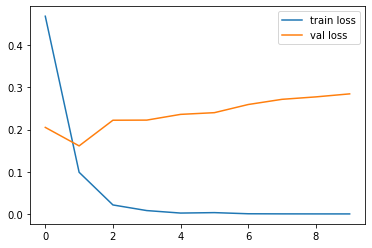

In [28]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

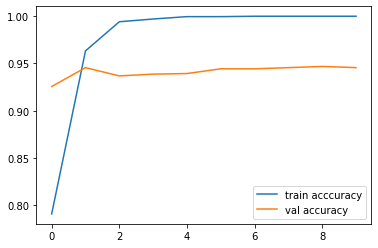

In [29]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='train acccuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()

In [30]:
predicted=model.predict(test_padded)

In [31]:
predicted

array([[8.7874192e-05],
       [9.9992508e-01],
       [9.4823056e-01],
       ...,
       [6.9888847e-05],
       [9.9902880e-01],
       [1.2457371e-04]], dtype=float32)

In [32]:
predDecision = []
for p in predicted:
    if (p > 0.5):
        predDecision.append(1)
    else:
        predDecision.append(0)
    

In [33]:
predDecision

[0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,


In [34]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, predDecision)

In [35]:
cm

array([[773,  48],
       [ 39, 740]], dtype=int64)

In [36]:
pval=[]
for pp in predicted:
    pval.append(pp)

In [37]:
predictionDecision = pd.DataFrame({
    'Review': test_texts,
    'Actual Class': test_labels,
    'Predcted Values': pval,
    'Predcted Decisions': predDecision
    
})
predictionDecision.to_excel('D:\ArabicSentimentAnalysisHybride\output\predictionDecision.xlsx')

In [38]:
from sklearn.metrics import classification_report
print(classification_report(test_labels, predDecision))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       821
           1       0.94      0.95      0.94       779

    accuracy                           0.95      1600
   macro avg       0.95      0.95      0.95      1600
weighted avg       0.95      0.95      0.95      1600



Text(0.5, 1.0, 'Refined Confusion Matrix')

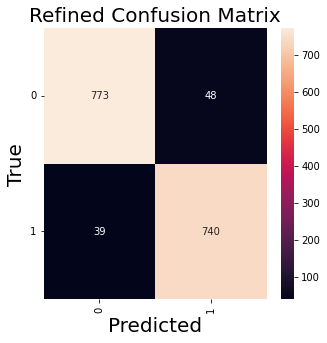

In [39]:
### Confusion Matrix
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
#predictions = model.predict(x_test, steps=len(x_test), verbose=0)
#y_pred=model.predict(x_test)
#y_pred = np.round(y_pred)

y_pred = np.argmax(predDecision, axis=-1)

y_true=np.argmax(test_labels, axis=-1)

cm = confusion_matrix(test_labels, predDecision)

## Get Class Labels
#labels = le.classes_
class_names = [0,1]

# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(5, 5))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(class_names, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(class_names, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Refined Confusion Matrix', fontsize=20)

In [40]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test_labels, predDecision)
print(mae)

0.054375


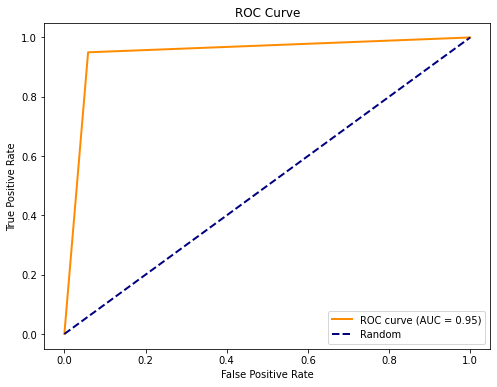

In [41]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Example: Replace these arrays with your actual data


# Calculate ROC curve
fpr, tpr, _ = roc_curve(test_labels, predDecision)

# Calculate Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [42]:
TN=394
FP=28
TP=358
FN=20

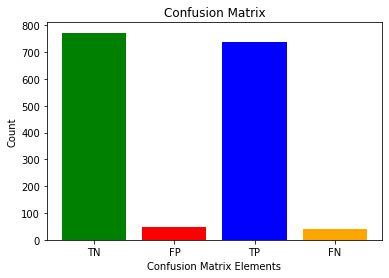

Precision: 0.94
Recall: 0.95
F1 Score: 0.94


In [44]:
import matplotlib.pyplot as plt

TN=773
FP=48
TP=740
FN=39

# Calculate metrics
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

# Create a bar graph
labels = ['TN', 'FP', 'TP', 'FN']
values = [TN, FP, TP, FN]

plt.bar(labels, values, color=['green', 'red', 'blue', 'orange'])
plt.xlabel('Confusion Matrix Elements')
plt.ylabel('Count')
plt.title('Confusion Matrix')
plt.show()

# Print additional metrics
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1_score:.2f}')
